In [5]:
##
import cvxpy as cp
import numpy as np

a = np.array([[9.4888,9.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464],
              [5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868]])

d = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        # 距离公式 
        d[i,j] = np.sqrt(np.sum((a[:,i] - a[:,j]) ** 2))

x = cp.Variable(10,integer = True)
y = cp.Variable((10,10),integer = True)
obj = cp.Minimize(cp.sum(x,axis=0))
con = [
    # sum(y) 是逐列求和 等价于cp.sum(x,axis=0)
    # sum(y.T) 相当于对y逐行求和
    cp.sum(y,axis=0) >= 1,cp.sum(y.T,axis=0) <= 5,
    x >= 0,x <= 1, y >= 0,y <= 1
]
for i in range(10):
    con.append(x[i] == y[i,i])
    for j in range(10):
        con.append(d[i,j] * y[i,j] <= 10 * x[i])
        con.append(x[i] >= y[i,j])

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)







最优解为: 2.0
x的取值为 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]


In [4]:
import numpy as np

a = np.array([[1,3],[1,3]])
print(np.sum((a[:,0] - a[:,1]) ** 2))




8


In [6]:
##
import cvxpy as cp
import numpy as np

a = np.array([[9.4888,9.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464],
              [5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868]])

d = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        # 距离公式 
        d[i,j] = np.sqrt(sum((a[:,i] - a[:,j]) ** 2))

x = cp.Variable(10,integer = True)
y = cp.Variable((10,10),integer = True)
obj = cp.Minimize(sum(x))
con = [
    # sum(y) 是逐列求和 等价于cp.sum(x,axis=0)
    # sum(y.T) 相当于对y逐行求和
    sum(y) >= 1,sum(y.T) <= 5,
    x >= 0,x <= 1, y >= 0,y <= 1
]
for i in range(10):
    con.append(x[i] == y[i,i])
    for j in range(10):
        con.append(d[i,j] * y[i,j] <= 10 * x[i])
        con.append(x[i] >= y[i,j])

prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解为:',prob.value)
print('x的取值为',x.value)







最优解为: 2.0
x的取值为 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]


w= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
v= [247.52 247.52 247.52 247.52 247.52 247.52 247.52 247.52  92.25  59.4
   0.  ]
Q= [2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2164.82
 2016.24  500.  ]


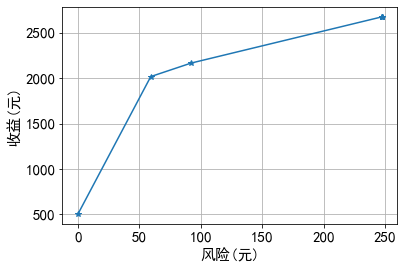

[array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([   0.        , 9900.99009901,   -0.        ,   -0.        ,
          -0.        ,  247.52475248]),
 array([ 1.93267624e-12,  9.90099010e+03,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  2.47524752e+02]),
 array([   0.        , 3690.03690037, 6150.06150062,   -0.        ,
          -0.        ,   92.25092251]),
 array([   0.   

In [7]:
import numpy as np
import cvxpy as cp
import pylab as plt


plt.rc('font',family='SimHei')
plt.rc('font',size =15)

x = cp.Variable(6,pos = True)
r = np.array([0.05,0.28,0.21,0.23,0.25])
p = np.array([0,0.01,0.02,0.045,0.065])
q = np.array([0,0.025,0.015,0.055,0.026])
def LP(w):
    V = [] #风险初始化
    Q = [] # 收益初始化
    X = [] # 最优解的初始化
    con = [(1 + p) @ x[:-1] == 10000]

    for i in range(1,5):
        con.append(q[i] * x[i] <= x[5])
    for i in range(len(w)):
        obj = cp.Minimize(w[i] * x[5] - (1-w[i]) * ((r-p) @ x[:-1]))
        prob = cp.Problem(obj,con)
        prob.solve(solver = 'GLPK_MI') 
        xx = x.value
        V.append(max(q * xx[:-1]))
        Q.append((r-p) @ xx[:-1])
        X.append(xx)
    
    print('w=',w)
    print('v=',np.round(V,2))
    print('Q=',np.round(Q,2))
    plt.figure()
    plt.plot(V,Q,'*-')
    plt.grid('on')
    plt.xlabel('风险(元)')
    plt.ylabel('收益(元)')
    plt.show()
    return X
w1 = np.arange(0,1.1,0.1)
LP(w1)




